## Overview of GenPic on GitHub

GenPic ist eine Sammlung von IPython Notebooks zur Generierung und Verwaltung von Bildern im SVG Format.

1. **GPGH01-Show-Palettes** stellt die Farbpaletten aus der Datei **color-palettes.data** da.

2. **GPGH02-Picture-Generator** generiert parametergesteuert Bilder und speichert sie als *svgz* File.

### History and Status - 20160810

The notebook *GP02-Redesign* is the base of the new development under GitHub:

- Functions and objects were taken to a module *gp-basics.py* ... as fare as possible or by dirty luke, code was not refectored as it should habe been done.

- *GPGH02-SVG-Generator* is/was the new generator notebook under the *GitHub development*

- **Line construction** is not implemented under *GP02-Rdesign* as it is under *GP02-Generator-old*. 
  Nevertheless line construction is implemented in *GPGH02-SVG-Generator*.
  
Actually improvements where made in the new files *attr_funcs.py and new_controls.ipynb* in this respository:

- Partly Redesign of *params*  to controls structure and adopting this to code

- Redesign is still running. Archivements should be integrated into the main stream.


## Picture Generator

GenPic nutzt verbreitete Standardkomponenten und Python Module.

+ Daten werden in Dateien gespeichert
    + Parameter und Farbpaletten werden in **Json** gespeichert.
    + Die Bilddaten werden in **SVG/SVGZ** gespeichert. 

+ Templates werden mit **Jinja2** erstellt.

+ Die XML Bearbeitung basiert auf **lxml**.

+ **Numpy** wird zur Array und List Generierung genutzt

### Roadmap

1) Zunächst Ertellung guter, einfacher und ausbaufähiger Basis-Module:
  + zur Lösung folgender Aufgaben:
    * Datenspeicherung: Files und alternativ auch Datenbank
    * Parameter-Steuerungskonzept und Aufbau
    * Figuren und Bildergenerierung
    * Farbpalettenverwaltung
    * Parameterverwaltung
  
  + Strukturiert in Funktionen und Objekten
  
  + klar strukturierte und dokumentierte Json Nutzung für Parameter
  
  + Nutzung von Generics, Abstraktion ....
 
  + **Alles gut progammiert, dokumentiert und testautomatisiert.**
  
2) Einfache ipynb's für Workflow:  
  + Farbpalette auswählen, bzw. erstellen
  + Komfortable und flexible SVG Generierung
  + Generierung von HTML Katalogen
  + *ggf. Bildermutationen etc. aus existierenden Bildern:*
    - z.B. Reihenfolge oder Figuren ändern, Bilder mischen etc.
  + Gut progammiert, dokumentiert und testautomatisiert.

3) Basis zum Aufbau einer Community schaffen
  + Nutzung und Darstellung in GitHub
  + Erstellung eines Wicki (siehe d3.js) - auch/insbesondere durch User:
    * Anleitungen z.B. für Konvertierung der Bilder in das png Format
    * Diskussion zur Nutzung von Parametern und Farbpaletten für Bilder
    * Einstellung und Erzeugung von Bildern
    * Nutzung eigener *Picture Structures* und *Figures*

#### Aktuelle to do's

**Offen**:

+ Bilder mit Gridmuster können nicht erstellt werden 
  
+ gp_basics.py ist nicht ausreichend dokumentiert

**Erledigt**:

### Import Modules and Constants

In [1]:
from gp_basics import *

import copy
from IPython.display import HTML, SVG

In [2]:
from random import randrange, choice

def rgb_rand(step=3):
    return randrange(0, 255, step)

def rgb2hex(r,g,b):
    return ('#%02x%02x%02x' % (r, g, b)).upper()

def rgb2svg(r, g, b):
    return 'rgb({}, {}, {})'.format(r, g, b)

###  Line Construction

In [3]:
nr_of_origins = 43
nr_of_lines = 2300

origins_x_area = (0, 100)
origins_y_area = (0, 100)

target_x_area = (0, 100)
target_y_area = (0, 100)

# Define starting points for the lines
origins =[]
targets =[]
for i in range(nr_of_origins):
    origins.append((randint(origins_x_area[0], origins_x_area[1]),
                    randint(origins_y_area[0], origins_y_area[1])))
for i in range(nr_of_lines):
    targets.append((randint(target_x_area[0], target_x_area[1]),
                    randint(target_y_area[0], target_y_area[1])))

# Define lines
lines =[]
for i in range(nr_of_lines):
    p1 = choice(origins)
    p2 = choice(targets)
    lines.append((p1[0], p1[1], p2[0], p2[1]))

## Produce Pictures

In [4]:
# Define basic picture attributtes for the pictures SVG template  like size, background ...
pic_attribs = {'svg_width':'20in', 'svg_height':'12in',
        'w_points':'100', 'h_points':'60',
        'fill':'#F0BE7C', 
        'opacity':'.3',
        'stroke':'#32A0A5',
        'stroke_opacity':'.3', 
        'stroke_width':'0.1'}

GRID


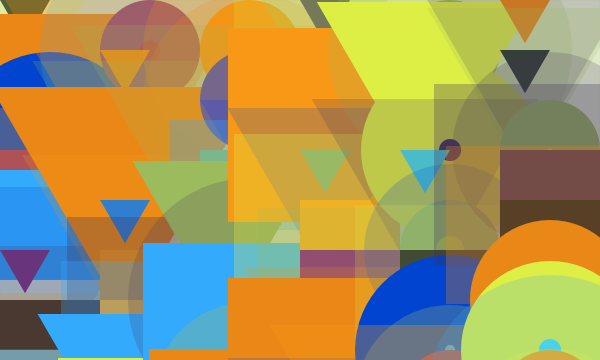

In [76]:
params ={}

#generate random colors
rgb_list = []
for j in range(12):
    rgb_list.append(rgb2hex( randrange(0,255,13), 
                            randrange(0,255,17),
                            randrange(0,255,23)))
pic_attribs['fill'] = choice(rgb_list)

params['structure'] = choice(['RANDOM', 'GRID'])
#params['structure'] = 'GRID'
# Used only for structure 'RANDOM'
params['nr_of_figures'] = 96
#Used only for structure 'GRID'
params['rows'], params['columns'] = 12, 6

if params['structure'] == 'RANDOM': 
    # params for circles rects and polygons(triangles) 
    params['x'] = ('ri', [-20, 80])
    params['y'] = ('ri', [-20, 120])
#    params['height'] = ('rc', ([ 73, .65, 59,   34 ,87], ))
#    params['width']  = ('rc', ([ 11.33, .59,   34, 29, 123], ))
    params['height'] = ('rr', [ 5, 34, 4] )
    params['width']  = ('rr', [ 3, 21, 5] )
if params['structure'] == 'GRID':
    l , w, h = create_grid(params['rows'],params['columns'])
    params['nr_of_figures'] = len(l)
    params['x'] = ('ar', ([round(e[0], 2) for e in l],))
    params['y'] = ('ar', ([round(e[1], 2) for e in l], ))
    params['height'] = ('ar', ([round(h, 2),] * len(l), ))
    params['width'] = ('ar', ([round(w, 2),] * len(l), ))

params['palette'] = rgb_list
# Params for figure creation
figs_to_choice = (  'polygon' , 'circle', 'rect' ) #'line'
params['figures'] = ('rc', [figs_to_choice, ]) 

#Zu verbessern djw 20161230
# params for lines
#params['x1'] = ('ar', ([l[0] for l in lines], ))
#params['y1'] = ('ar', ([l[1] for l in lines], ))
#params['x2'] = ('ar', ([l[2] for l in lines], ))  #('ri', [0, 100])
#params['y2'] = ('ar', ([l[3] for l in lines], ))

#y1_list = list(range(21, 100, 23)) * int((params['nr_of_figures']  / 3))
#params['y1'] = ('ar', (y1_list, ))
#y2_list = copy.deepcopy(y1_list)
#params['y2'] = ('ar', (y2_list, ))


# params for svg style 
params['fill'] = ('rc', [rgb_list[:],] )
#params['opacity'] = ('rc', [( .1, .5, .7), ]) 
params['stroke'] = ('rc', [rgb_list[2:-3],] )
#params['stroke-linecap'] = ('rc', (["round",], ))
params['stroke-opacity'] = ('rc', [(.2, .3, 1), ])
params['stroke-width'] = ('ri', [10 ,25 ])
#params['transform'] = ('rr', [0, 361, 90] )

print(params['structure'])
svg = SVGPicture(params, pic_attribs=pic_attribs) 
SVG(svg.xml_to_string().replace('20in', '600px').replace('12in', '360px'))

### Save Picture To File

In [77]:
svg.to_file(zip = False)

20180309-0944-04707615


#### Show SVG-Files

In [1]:
!ls svg > svg_files.txt

In [4]:
# %load svg_files.txt
svg_file_names = fromfile('svg_files.txt').split('\n')

svg/pic-20160727-2231-10452314.svg


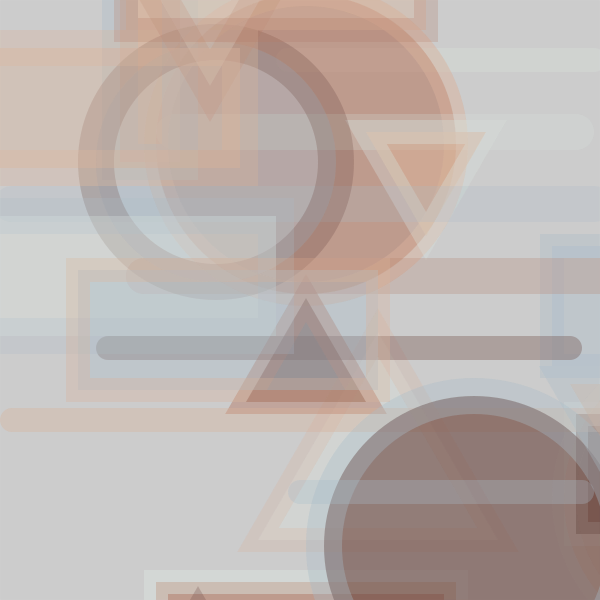

In [5]:
f_name = 'svg/' + svg_file_names[9]
print(f_name)

if not f_name[-4:] == '.svg':
    svg_content = unzip_file(f_name).decode("utf-8")
else:
    svg_content = fromfile(f_name)
    
SVG(svg_content.replace('21in', '600px'))

#### New order of elements

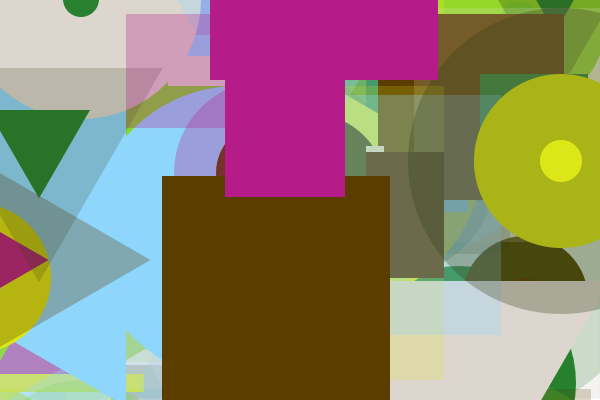

In [155]:
from random import shuffle

lines = svg.xml_to_string().split('\n')

start_line = 0
counter = 1
for l in lines:
    counter += 1
    if l.find('Show outline') > 0:
        start_line = counter + 3
#    if start_line == counter:
#        print(counter, '\t' , l)

new_order = lines[start_line:-1]
shuffle(new_order)
new_svg = (lines[0:start_line - 3] + new_order + lines[-1:])
SVG('\n'.join(new_svg).replace('21in', '600px').replace('14in', '400px'))

### RGB Colors by random

In [6]:
html5_header ="""<!DOCTYPE html>
<html><head>;
<style>
table, th, td {border: none; }
</style>
</head> <body> <table >"""

html5_td = '<td style="background-color:{};height:60px; width:60px">'

html5_tail = """</table> </body> </html>"""

In [16]:
circles = []
rgb_list = []
for i in range(3):
    circles.append('<tr>')
    for j in range(5):
        rgb_list.append(rgb2hex( randrange(0,255,30),
                                randrange(10,255,30),randrange(0,255,31)))
        s = html5_td.format(rgb_list[-1]) + rgb_list[-1] + '</td>'
        #s = '<td>' + circle.format(rgb_list[-1]) + '</td>'
        circles.append(s)
    circles.append('</tr>')
html_text = html5_header + '\n'.join(circles) + html5_tail

HTML(html_text)

#F0BEBA,#1E827C,#780A5D,#D20A00,#5A467C
#000AD9,#3CBEF8,#B46400,#00A0D9,#960A00
#F0647C,#D2281F,#96DCF8,#960ABA,#F0DC7C


### Experimente mit d3.js

Hier fehlt:

- Eine kleine Dokumentation und Erklärung
- Die Darstellung der Ergebnisse in dem Jupyter Notebook - Jupyter beherrscht Javascript coding (%%Javascript etc) => ggf. ist Jupyter auch für mich das optimale Werkzeug neue Sprachen zu lernen
- Die Trennung in ein eigenes Notebook ;-)

In [17]:

svg_styles = ('fill', 'opacity', 'stroke', 'stroke-width',  'stroke-opacity')
svg_attrs = ('x', 'y', 'width', 'height', 'x1', 'x2', 'y1', 'y2', 'cx', 'cy', 'r')

def d3_append_elem(parent, child):
    return '{}.append("{}")'.format(parent, child)


def d3_attr_line(name, value):
    if name in style_names:
        kind = 'style'
    else:
        kind =  'attr'
    return '\t.{}("{}", "{}")'.format(kind, name, value)

#for i, n in enumerate(style_names + attr_names):
#    print (d3_attr_line(n, i))

In [26]:
import random

# functions to create attributte values are callable by dict keys 
def fifo_func(values):
    return values.pop(0)

RM_FUNCTION = {'ri': random.randint,
               'rc': random.choice,
               'ar': fifo_func}

def set_attributes(params):
    """random/algorithm based SVG attributes creation"""
    attribs = {}
    for k, v in params.items():
        if k in svg_styles or k in svg_attrs:
            attribs[k] = RM_FUNCTION[v[0]](*v[1])
    return attribs
    
def attribs_to_string(attribs):
    return [d3_attr_line(k, v) for k, v in attribs.items()]



In [27]:
n = 7
lines = []
while n > 0:
    lines.append(d3_append_elem('svg', 'circle'))
    lines += attribs_to_string(set_attributes(params))
    n -= 1
txt = '\n'.join(lines)
print(txt)

IndexError: pop from empty list